In [69]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook
from sklearn import svm
%matplotlib inline 
from sklearn.model_selection import train_test_split
RANDOM_STATE=17
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
df_train = pd.read_csv('./train.csv', index_col='id')
df_test = pd.read_csv('./test.csv', index_col='id')

In [6]:
df_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,9.589074,33.333333,2,2,1,0,1,1,1,0


<Axes: >

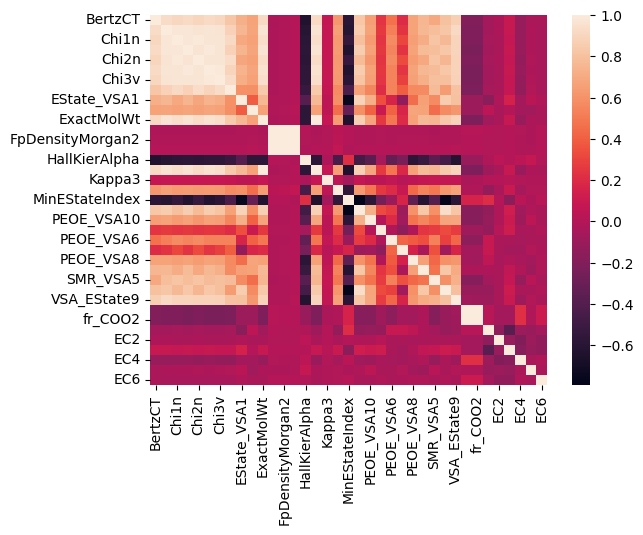

In [7]:
sns.heatmap(df_train.corr());

In [17]:
y_train

,EC1,EC2
id,,
0,1,1
1,0,1
2,1,1
3,1,1
4,1,0
...,...,...
14833,1,1
14834,0,1
14835,1,1


In [39]:
y = y_train.to_numpy()

In [40]:
y

array([[0, 1],
       [0, 1],
       [1, 1],
       ...,
       [1, 1],
       [0, 1],
       [0, 1]])

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train, y_train, test_size=0.2,
                                                     random_state=RANDOM_STATE)

In [29]:
np.unique(y_train)

array([0, 1])

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [33]:
pca = PCA(0.90, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

In [34]:
pca.n_components_

12

In [50]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)

KMeans(n_clusters=2, n_init=100, random_state=17)

In [51]:
cluster_labels = kmeans.labels_

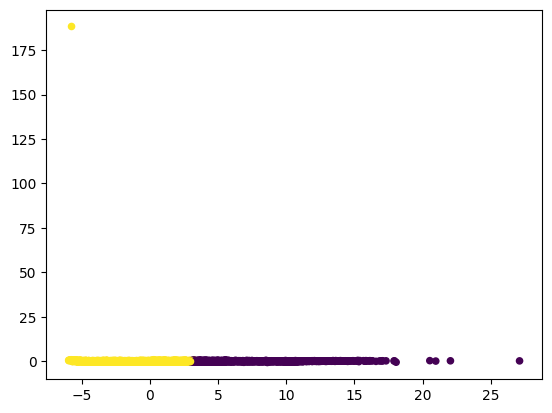

In [52]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, s=20,  cmap='viridis');

In [55]:
inertia = []
for k in tqdm_notebook(range(1, 7)):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

/tmp/ipykernel_16765/1428768659.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(1, 7)):


  0%|          | 0/6 [00:00<?, ?it/s]

/home/horcrux/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/horcrux/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/horcrux/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/horcrux/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/horcrux/.local/lib/pyt

In [56]:
inertia

[614.4752573661636,
 483.53883218641556,
 445.52517245000274,
 403.663123825792,
 384.8785064935879,
 366.5205076962098]

In [59]:
ag = AgglomerativeClustering(n_clusters=6, 
                             linkage='ward').fit(X_pca)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_valid)

In [72]:
y = y_train.to_numpy()
X = X_train.to_numpy()

In [74]:
y = y_train.values.reshape(-1,1)
X = X_train.values.reshape(-1,1)

In [75]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X, y)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

/home/horcrux/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [415450, 23740]

In [66]:
pca = PCA(0.90, random_state=RANDOM_STATE)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.fit_transform(X_test_scaled)

In [67]:
best_svc_pca = GridSearchCV(rbf, svc_params,cv=3, n_jobs=-1)
best_svc_pca.fit(X_pca_train,y_train)

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py", line 263, in fit
    X, y = self._validate_data(
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1143, in _check_y
    y = column_or_1d(y, warn=True)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1202, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (7913, 2) instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py", line 263, in fit
    X, y = self._validate_data(
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1143, in _check_y
    y = column_or_1d(y, warn=True)
  File "/home/horcrux/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1202, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (7914, 2) instead.


In [ ]:
best_svc_pca.best_score_, best_svc_pca.best_params_